In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show_images(inp_img, out_img):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('../data/out_images/pastel_result.png', img)

In [3]:
# Load the image
image_path = "../data/inp_images/tower.jpeg"
image = cv2.imread(image_path)

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
# Làm mờ ảnh bằng Gaussian Blur để tạo cảm giác mềm mại
blurred = cv2.GaussianBlur(image_rgb, (11, 11), 0)

In [6]:
# Giảm độ sâu màu bằng cách chia số lượng màu để tạo hiệu ứng pastel
def reduce_color_depth(img, levels=25):
    # Giảm số lượng màu trong ảnh
    factor = 255 // (levels - 1)
    return (img // factor) * factor

In [7]:
# Áp dụng giảm độ sâu màu
pastel_image = reduce_color_depth(blurred)

In [8]:
# Phát hiện cạnh và làm nổi bật các đường nét
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

In [9]:
# Kết hợp ảnh mờ pastel với các đường nét
pastel_effect = cv2.addWeighted(pastel_image, 0.9, edges_colored, 0.1, 0)

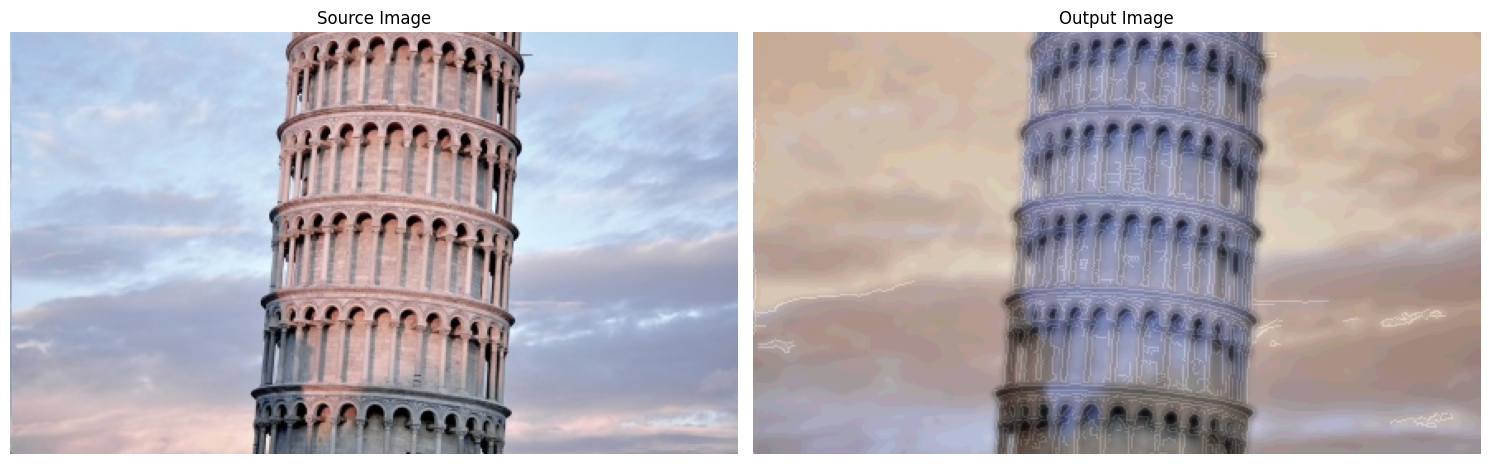

In [10]:
show_images(image, pastel_effect)